In [1]:
import os
import pickle
import PIL.Image
import numpy as np
import dnnlib
import dnnlib.tflib as tflib
import config
from encoder.generator_model import Generator

import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'dnnlib'

In [2]:
URL_FFHQ = 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ'

tflib.init_tf()
with dnnlib.util.open_url(URL_FFHQ, cache_dir=config.cache_dir) as f:
    generator_network, discriminator_network, Gs_network = pickle.load(f)

generator = Generator(Gs_network, batch_size=1, randomize_noise=False)

NameError: name 'tflib' is not defined

In [3]:
def generate_image(latent_vector):
    latent_vector = latent_vector.reshape((1, 18, 512))
    generator.set_dlatents(latent_vector)
    img_array = generator.generate_images()[0]
    img = PIL.Image.fromarray(img_array, 'RGB')
    return img.resize((256, 256))

def move_and_show(latent_vector, direction, coeffs):
    fig,ax = plt.subplots(1, len(coeffs), figsize=(15, 10), dpi=80)
    for i, coeff in enumerate(coeffs):
        new_latent_vector = latent_vector.copy()
        new_latent_vector[:8] = (latent_vector + coeff*direction)[:8]
        ax[i].imshow(generate_image(new_latent_vector))
        ax[i].set_title('Coeff: %0.1f' % coeff)
    [x.axis('off') for x in ax]
    plt.show()

In [4]:
# Loading already learned representations
donald_trump = np.load('ffhq_dataset/latent_representations/donald_trump_01.npy')
hillary_clinton = np.load('ffhq_dataset/latent_representations/hillary_clinton_01.npy')

# Of course you can learn your own vectors using two scripts

# 1) Extract and align faces from images
# python align_images.py raw_images/ aligned_images/

# 2) Find latent representation of aligned images
# python encode_images.py aligned_images/ generated_images/ latent_representations/

FileNotFoundError: [Errno 2] No such file or directory: 'ffhq_dataset/latent_representations/donald_trump_01.npy'

In [5]:
# Loading already learned latent directions
smile_direction = np.load('ffhq_dataset/latent_directions/smile.npy')
gender_direction = np.load('ffhq_dataset/latent_directions/gender.npy')
age_direction = np.load('ffhq_dataset/latent_directions/age.npy')

# In general it's possible to find directions of almost any face attributes: position, hair style or color ... 
# Additional scripts for doing so will be realised soon

FileNotFoundError: [Errno 2] No such file or directory: 'ffhq_dataset/latent_directions/smile.npy'

# Smile transformation

In [6]:
move_and_show(donald_trump, smile_direction, [-1, 0, 2])

NameError: name 'donald_trump' is not defined

In [7]:
move_and_show(hillary_clinton, smile_direction, [-1, 0, 1])

NameError: name 'hillary_clinton' is not defined

# Gender transformation

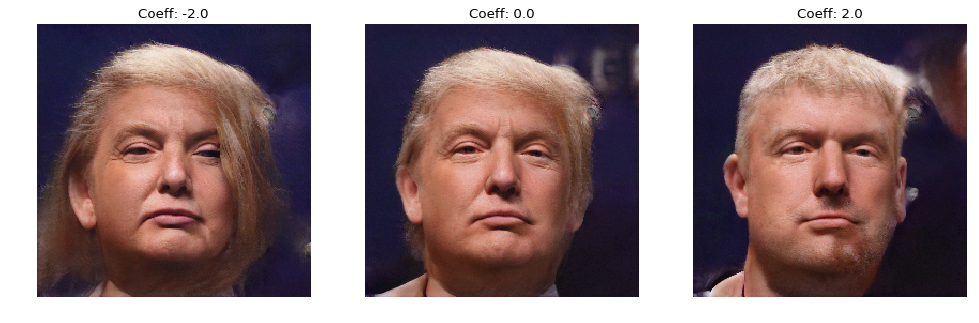

In [16]:
move_and_show(donald_trump, gender_direction, [-2, 0, 2])

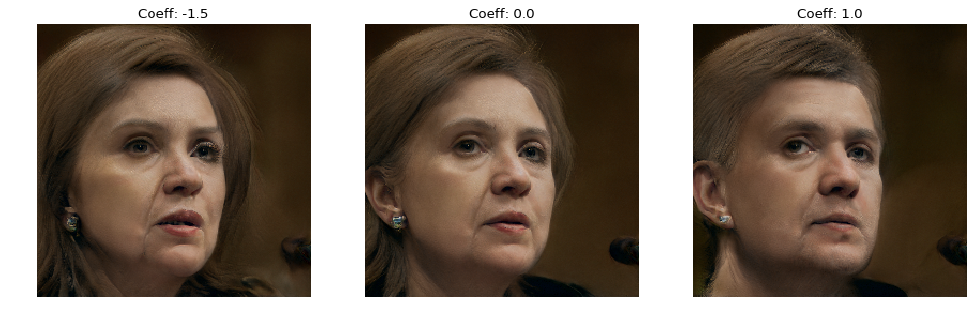

In [15]:
move_and_show(hillary_clinton, gender_direction, [-1.5, 0, 1.])

# Age transformation

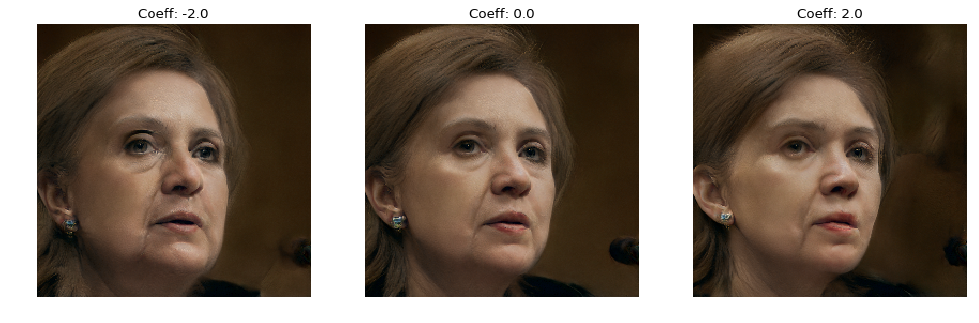

In [17]:
move_and_show(hillary_clinton, age_direction, [-2, 0, 2])

In [ ]:
# try it yourself!
move_and_show(donald_trump, age_direction, [-3, 0, 1])